# Part C #

In [1]:
# Lets import the necessary libraries
import pandas as pd

1. Read the CSV file.

In [2]:
# Read the dataset
df=pd.read_csv("CompanyX_EU.csv")
df.sample(5)

,Startup,Product,Funding,Event,Result,OperatingState
304,Leapfin,leapfin.com,$1M,Disrupt SF 2015,Finalist,Operating
356,Money Intel,moneyintel.com,NaN,Disrupt SF 2015,Contestant,Operating
39,Artomatix,artomatix.com,NaN,Disrupt SF 2015,Contestant,Operating
146,Dispatch,dispatch.com,$983K,Disrupt SF 2012,Contestant,Acquired
242,HealthyWage,healthywage.com,NaN,TC50 2009,Contestant,Operating


2.A. Check the datatypes of each attribute

In [3]:
# Check the datatype of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


2.B. Check for null values in the attributes

In [4]:
# Check for null values in the attributes
df.isna().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

3.A. Drop the null values

In [5]:
# Drop null values
df1=df.dropna()

3.B. Convert the ‘Funding’ features to a numerical value

In [6]:
import warnings   
# Settings the warnings to be ignored 
warnings.filterwarnings("ignore") 
# Convert the ‘Funding’ features to a numerical value
df1.loc[:,"Funds_in_million"] = df1["Funding"].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1 to 661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Startup           446 non-null    object 
 1   Product           446 non-null    object 
 2   Funding           446 non-null    object 
 3   Event             446 non-null    object 
 4   Result            446 non-null    object 
 5   OperatingState    446 non-null    object 
 6   Funds_in_million  446 non-null    float64
dtypes: float64(1), object(6)
memory usage: 27.9+ KB


3.C. Plot box plot for funds in million

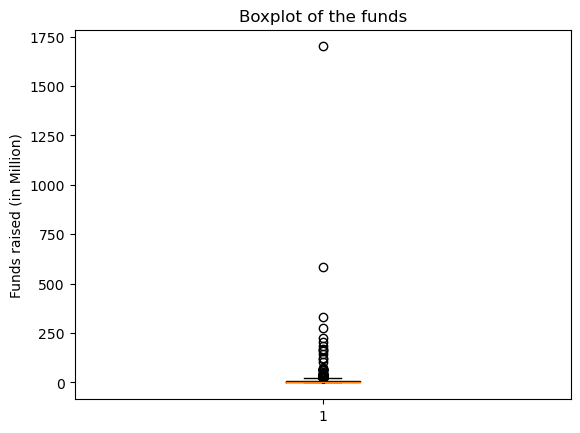

In [7]:
# Let's import necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
# Plot box plot for funds in million
plot = plt.boxplot(df1["Funds_in_million"])
plt.title("Boxplot of the funds")
plt.ylabel("Funds raised (in Million)")
plt.show()

3.D. Check the number of outliers greater than the upper fence

In [8]:
# Let's check few statistical values for Funds_in_million
df1.describe()

,Funds_in_million
count,446.000000
mean,17.241489
std,90.483710
min,0.005000
25%,0.745250
50%,2.200000
75%,9.475000
max,1700.000000


In [9]:
# Let's calculate the upper fence => Q3 + 1.5*(Q3-Q1)
upper_fence=9.475+1.5*(9.475-0.74525)
upper_fence

22.569625

In [10]:
# Calculate no. of outliers greater than the upper fence
no_of_outliers=len(df1[df1["Funds_in_million"] > upper_fence])
print("Number of outliers: ",no_of_outliers)

Number of outliers:  60


3.E. Check frequency of the OperatingState features classes

In [11]:
# Check frequency of the OperatingState features classes
df1["OperatingState"].value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

4.A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?

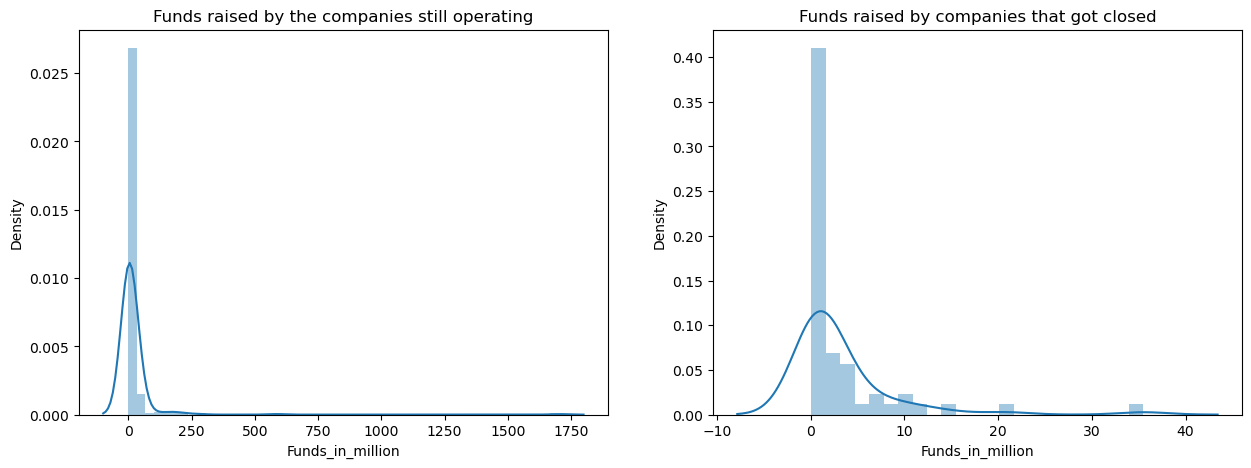

In [12]:
#Let's import necessary libraries
import seaborn as sns
import warnings   
# Settings the warnings to be ignored 
warnings.filterwarnings("ignore") 

# Any difference between Funds raised by companies that are still operating vs companies that closed down
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(df1.loc[df1["OperatingState"] == "Operating", "Funds_in_million"], ax = ax[0])
sns.distplot(df1.loc[df1["OperatingState"] == "Closed", "Funds_in_million"], ax = ax[1])

ax[0].set_title("Funds raised by the companies still operating")
ax[1].set_title("Funds raised by companies that got closed")
plt.show()

In [13]:
print("Unable to state any differences using graphs (visuals)")

Unable to state any differences using graphs (visuals)


4.B. Write the null hypothesis and alternative hypothesis

In [14]:
# null hypothesis and alternative hypothesis
print("Null Hypothesis (Ho): There is no difference between the average of Funds raised by companies that are still operating vs companies that closed down")
print("Alternate Hypothesis (Ha): There is a significant difference between the average of Funds raised by companies that are still operating vs companies that closed down")

Null Hypothesis (Ho): There is no difference between the average of Funds raised by companies that are still operating vs companies that closed down
Alternate Hypothesis (Ha): There is a significant difference between the average of Funds raised by companies that are still operating vs companies that closed down


4.C. Test for significance and conclusion

In [15]:
# Test for significance and conclusion
alpha=0.05
print("Let s1 and s2 be the two samples of Funds_in_million for OperatingState equal to Operating and Closed respectively")

Let s1 and s2 be the two samples of Funds_in_million for OperatingState equal to Operating and Closed respectively


In [16]:
s1 = df1.loc[df1["OperatingState"] == "Operating", "Funds_in_million"]
print("Length of sample1: ",len(s1))

Length of sample1:  319


In [17]:
s2 = df1.loc[df1["OperatingState"] == "Closed", "Funds_in_million"]
print("Length of sample2: ",len(s2))

Length of sample2:  57


In [18]:
# Let's import significant libraries
import scipy.stats as stats
test_statistic, p_value = stats.ttest_ind(s1,s2)
if p_value <= alpha:
    print(f"We reject the Null hypothesis since the p-value, {0} < {alpha} (alpha=level of significance)")
else:
    print(f"We fail to reject the Null hypothesis since the p-value, {round(p_value,3)} > {alpha} (alpha=Level of significance)")

We fail to reject the Null hypothesis since the p-value, 0.256 > 0.05 (alpha=Level of significance)


4.D. Make a copy of the original data frame.

In [19]:
# Make a copy of the original data frame
df2 = df1.copy()
df2.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


4.E. Check frequency distribution of Result variables

In [20]:
# Check frequency distribution of Result variables
df2["Result"].value_counts()

Contestant         312
Finalist            65
Audience choice     25
Winner              25
Runner up           19
Name: Result, dtype: int64

4.F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating 

In [21]:
# Calculate percentage of winners that are still operating and percentage of contestants that are still operating 
winners = df2["Result"].value_counts()["Winner"]
print("Total winners: ",winners)
contestants = df2["Result"].value_counts()["Contestant"]
print("Total contestants: ",contestants)
operating_w = df2["OperatingState"][df2["Result"] == 'Winner'].value_counts().loc["Operating"]
print("Operating winners: ",operating_w)
operating_c = df2["OperatingState"][df2["Result"] == 'Contestant'].value_counts().loc["Operating"]
print("Operating contestants: ",operating_c)
print("Percentage of Operating Winners: ",round(operating_w*100/winners,2)) 
print("Percentage of Operating Contestants: ",round(operating_c*100/contestants,2)) 

Total winners:  25
Total contestants:  312
Operating winners:  18
Operating contestants:  214
Percentage of Operating Winners:  72.0
Percentage of Operating Contestants:  68.59


4.G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants

In [22]:
# Write your hypothesis comparing the proportion of companies that are operating between winners and contestants
print("Null hypothesis (Ho): Proportion of companies that are operating between winners and contestants is same in both categories.")
print("Alternative hypothesis (Ha): Proportion of companies that are operating between winners and contestants is different from each other")

Null hypothesis (Ho): Proportion of companies that are operating between winners and contestants is same in both categories.
Alternative hypothesis (Ha): Proportion of companies that are operating between winners and contestants is different from each other


4.H. Test for significance and conclusion

In [23]:
# Test for significance and conclusion
# Let's import significant libraries
from statsmodels.stats.proportion import proportions_ztest
alpha=0.05
test_statistic, p_value = proportions_ztest([operating_c, operating_w], [contestants, winners])

if p_value <= alpha:
    print(f"We reject the Null hypothesis since the p-value, {round(p_value,3)} < {alpha} (alpha=level of significance)")
else:
    print(f"We fail to reject the Null hypothesis since the p-value, {round(p_value,3)} > {alpha} (alpha=Level of significance)")

We fail to reject the Null hypothesis since the p-value, 0.723 > 0.05 (alpha=Level of significance)


4.I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards

In [24]:
# Select only the Event that has ‘disrupt’ keyword from 2013 onwards
events = df2[df2["Event"].apply(lambda e: 'Disrupt' in e and int(e[-4:]) > 2013)]["Event"] 
events

3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
18        Disrupt NYC 2014
              ...         
633        Disrupt NY 2015
634        Disrupt SF 2015
635        Disrupt NY 2015
642        Disrupt SF 2014
646    Disrupt London 2015
Name: Event, Length: 140, dtype: object